# Influence of Events on President Approval Rate
By Paul P.<br>
This project was created by a collection of Trump Approval polls by [FiveThirtyEight](https://projects.fivethirtyeight.com/trump-approval-ratings/) and data scraped from the [Miller Center](https://millercenter.org/president/trump/key-events).

## Goals
The main objective of this project is to <b>analyze the change in approval rates</b> of a United States President <strong>in correlation to key events</strong> during their term. For this anaylsis, I will use poll data <em>(approval.csv)</em> of former President Trump. <br> 

We will organize this project with these questions:
1. What is the change of approval rate over time?
2. How do the events influence the approval rate?
3. What are the top influential events during the Trump Presidency?

## Retrieving Data (Web Scapring)

The poll data <em>(approval.csv)</em> we are using has been adjusted to address sample size uncertainties and house effects. I could not find a dataset for key events during the Trump Presidency so I will have to web scrap from the [Miller Center - Key Events](https://millercenter.org/president/trump/key-events) website.

In [26]:
# importing HTML parser
import requests
from bs4 import BeautifulSoup

Web scraping the data from each key event.

In [27]:
# website
URL = "https://millercenter.org/president/trump/key-events"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
for i in soup.findAll('time'):
        if i.has_attr('datetime'):
            print(i['datetime'])


2017-01-20T12:00:00Z
2017-01-21T12:00:00Z
2017-01-23T12:00:00Z
2017-01-23T12:00:00Z
2017-01-27T12:00:00Z
2017-01-31T12:00:00Z
2017-02-13T12:00:00Z
2017-03-06T12:00:00Z
2017-03-28T12:00:00Z
2017-04-07T12:00:00Z
2017-04-10T12:00:00Z
2017-05-09T12:00:00Z
2017-05-17T12:00:00Z
2017-06-01T12:00:00Z
2017-07-28T12:00:00Z
2017-08-12T12:00:00Z
2017-08-18T12:00:00Z
2017-08-21T12:00:00Z
2017-09-19T12:00:00Z
2017-10-30T12:00:00Z
2017-11-05T12:00:00Z
2017-12-01T12:00:00Z
2017-12-22T12:00:00Z
2018-01-20T12:00:00Z
2018-01-23T12:00:00Z
2018-02-13T12:00:00Z
2018-02-16T12:00:00Z
2018-03-24T12:00:00Z
2018-03-31T12:00:00Z
2018-05-08T12:00:00Z
2018-05-09T12:00:00Z
2018-05-14T12:00:00Z
2018-05-17T12:00:00Z
2018-06-12T12:00:00Z
2018-06-20T12:00:00Z
2018-07-05T12:00:00Z
2018-07-09T12:00:00Z
2018-07-16T12:00:00Z
2018-08-21T12:00:00Z
2018-10-06T12:00:00Z
2018-11-06T12:00:00Z
2018-11-07T12:00:00Z
2018-12-12T12:00:00Z
2018-12-22T12:00:00Z
2019-01-01T12:00:00Z
2019-01-03T12:00:00Z
2019-01-25T12:00:00Z
2019-02-14T12

Web scarping the title of each key event. I won't use the description for this analysis. 

In [28]:
mydivs = soup.find_all("span", {"class": "field-content"})
for element in mydivs:
    print(element.prettify())

<span class="field-content">
 Trump inaugurated
</span>
<span class="field-content">
 Women's March
</span>
<span class="field-content">
 Global gag rule reinstated
</span>
<span class="field-content">
 Withdrawal from the Trans-Pacific Partnership
</span>
<span class="field-content">
 Travel ban
</span>
<span class="field-content">
 Gorsuch nominated for SCOTUS
</span>
<span class="field-content">
 Flynn resigns
</span>
<span class="field-content">
 New executive order on the travel ban
</span>
<span class="field-content">
 Reversal on environmental protection
</span>
<span class="field-content">
 Action against Syrian government
</span>
<span class="field-content">
 Neil M. Gorsuch joins the US Supreme Court
</span>
<span class="field-content">
 FBI director James Comey removed
</span>
<span class="field-content">
 Robert Muller chosen as special counsel
</span>
<span class="field-content">
 Withdrawal from Paris climate accord
</span>
<span class="field-content">
 Chief of Staff Kel

Now that we have the key events, I will bring them to Excel to do a quick data cleaning and save them to a csv. <em>(Events.csv)</em> 

And now that we have our data, we can continue to importing to Pandas and doing the data manipulation needed for our analysis.

## Reading and Manipulating Data

First, I will read the two seperate `.csv` files into a **Pandas** dataframe.

In [29]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
df = pd.read_csv('approval.csv')
df['enddate'] = df['enddate'].astype('datetime64[ns]')
df.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,1/20/2021,1/20/2017,2017-01-22,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.686784,38.055805,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,1/20/2021 11:47
1,Donald Trump,All polls,1/20/2021,1/20/2017,2017-01-22,Gallup,B,1500.0,a,0.262323,...,45.0,45.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,1/20/2021 11:47
2,Donald Trump,Adults,1/20/2021,1/20/2017,2017-01-22,Gallup,B,1500.0,a,0.262323,...,45.0,44.957442,43.763923,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,1/20/2021 11:49
3,Donald Trump,Voters,1/20/2021,1/20/2017,2017-01-22,Morning Consult,B/C,1992.0,rv,0.681712,...,37.0,46.495997,37.343779,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,1/20/2021 11:52
4,Donald Trump,All polls,1/20/2021,1/21/2017,2017-01-23,Gallup,B,1500.0,a,0.242845,...,46.0,45.861441,44.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,1/20/2021 11:47


In [31]:
# reading the Events spreadsheet that we web scraped earlier
df_ev = pd.read_csv('Events.csv')
df_ev.Date = df_ev.Date.astype('datetime64[ns]')

# renaming our date column for df merge purposes
df_ev['enddate'] = df_ev['Date']
df_ev = df_ev.set_index('enddate').drop('Date', axis=1)

df_ev.head()

,Event
enddate,
2017-01-20,Trump inaugurated
2017-01-21,Women's March
2017-01-23,Global gag rule reinstated
2017-01-23,Withdrawal from the Trans-Pacific Partnership
2017-01-27,Travel ban


Since there are multiple polls per day, we will find the mean for each day and set that as the approval rate for that day. Since we want to make a lineplot with the polls, it's also important to summarize the data for a cleaner line. We will use `rolling()` and `mean()` for this.

In [32]:

df_rate = df[['adjusted_approve', 'enddate']].set_index('enddate')
df_rate = df_rate.rolling(min_periods=1, window=100).mean().dropna()


df_rate = df_rate.groupby(pd.Grouper(freq='D')).mean()

df_rate = df_rate.rename(columns={'adjusted_approve': 'Approval_Rate'})
df_rate.head()

,Approval_Rate
enddate,
2017-01-22,45.678300
2017-01-23,45.704689
2017-01-24,45.796792
2017-01-25,45.442756
2017-01-26,45.352658


Then we will merge the two dataframes so we know what the approval rate was at the **key event** date.

In [33]:
# merge key events df with approval rates df
df_ev_rate = pd.merge(df_rate, df_ev, left_index=True, right_index=True).reset_index()

df_ev_rate.head()

,enddate,Approval_Rate,Event
0,2017-01-23,45.704689,Global gag rule reinstated
1,2017-01-23,45.704689,Withdrawal from the Trans-Pacific Partnership
2,2017-01-27,45.338070,Travel ban
3,2017-01-31,45.713108,Gorsuch nominated for SCOTUS
4,2017-02-13,44.845641,Flynn resigns


## Analyzing the Data

First, let's observe the change in approval rate over time. This kernal density estimate plot can be used to see the difference between approval and disapproval rates over the four-year presidency.

C:\Users\Paul\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'ax1'
  cset = contour_func(


(33.0, 61.0)

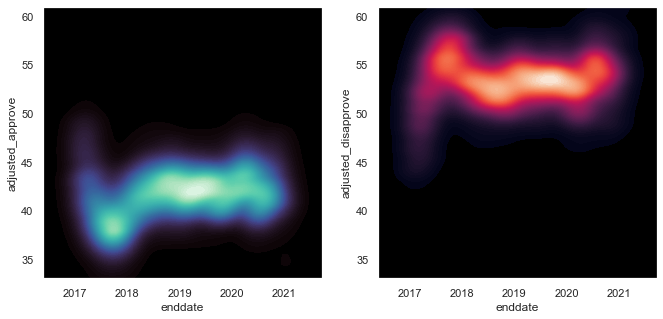

In [34]:
f, axes = plt.subplots(1, 2, figsize=(11,5))
sns.set(rc={'axes.facecolor': 'black', 'grid.color': 'black'})

ax = sns.kdeplot(data=df, x='enddate', y='adjusted_approve', levels=100, thresh=0.01, fill=True, cmap='mako', ax=axes[0])
ax1 = sns.kdeplot(data=df, x='enddate', y='adjusted_disapprove', color='w', levels=100, thresh=0.01, fill=True, cmap='rocket', ax1=axes[1])

ax.set_ylim(33,61)
ax1.set_ylim(33,61)

This kde plot illustrates the most dense point in the approval and disapproval rates.

<AxesSubplot:xlabel='adjusted_disapprove', ylabel='Density'>

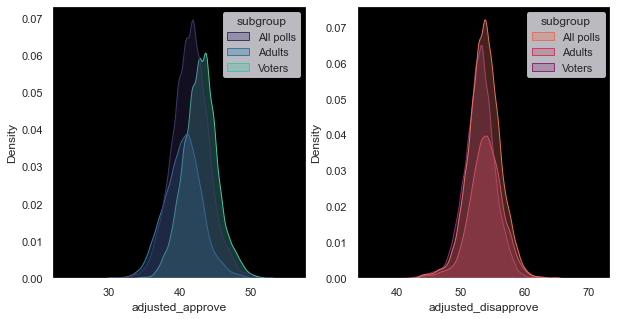

In [35]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.set_style('darkgrid')

sns.kdeplot(data=df, x='adjusted_approve', hue='subgroup', fill=True, alpha=.3, ax=axes[0], palette='mako')
sns.kdeplot(data=df, x='adjusted_disapprove', hue='subgroup', fill=True, alpha=.3, ax=axes[1], palette='flare')


And now for the main visualization. First I will create some variables for some key events for reference. These are not chosen by any concrete criteria, just some for reference.

In [36]:
Capitol = df_ev_rate.loc[df_ev_rate['enddate'] == '2021-01-06']
Impeach = df_ev_rate.loc[df_ev_rate['enddate'] == '2019-12-18']
Drone = df_ev_rate.loc[df_ev_rate['enddate'] == '2020-03-27']
Tax_Bill = df_ev_rate.loc[df_ev_rate['enddate'] == '2017-12-22']
FBI = df_ev_rate.loc[df_ev_rate['enddate'] == '2017-05-09']

Every key event in our Key Events dataframe will be plotted in relation to the approval rate on the date of the event. The lineplot visualizes the fluctation in approval rate for Trump throughout his presidency. Some key events have more influence than others. We will analyze that further.

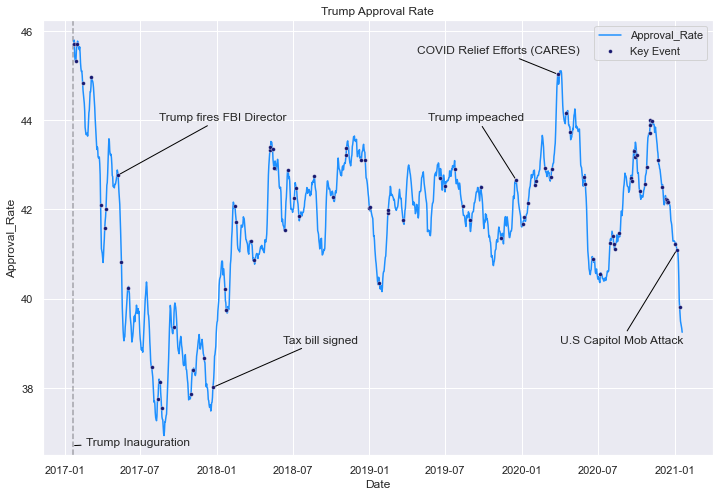

In [37]:
palette = {'Approval_Rate': 'dodgerblue'}
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
Labels = ['']

sns.lineplot(data=df_rate, palette=palette, zorder=5).set(xlabel='Date')
sns.scatterplot(data=df_ev_rate, x='enddate', y='Approval_Rate', c=['midnightblue'], s=15, zorder=10, label='Key Event')
plt.title('Trump Approval Rate')

plt.annotate(xy=(Capitol.enddate, Capitol.Approval_Rate), xytext=(Capitol.enddate+ pd.Timedelta(weeks=-40), 39), text='U.S Capitol Mob Attack', arrowprops=dict(color='black', arrowstyle='-'))

plt.annotate(xy=(Impeach.enddate, Impeach.Approval_Rate), xytext=(Impeach.enddate+ pd.Timedelta(weeks=-30), 44), text='Trump impeached', arrowprops=dict(color='black', arrowstyle='-'))

plt.annotate(xy=(Drone.enddate, Drone.Approval_Rate), xytext=(Drone.enddate+ pd.Timedelta(weeks=-48), 45.5), text='COVID Relief Efforts (CARES)', arrowprops=dict(color='black', arrowstyle='-'))

plt.annotate(xy=(FBI.enddate, FBI.Approval_Rate), xytext=(FBI.enddate+ pd.Timedelta(weeks=+14), 44), text='Trump fires FBI Director', arrowprops=dict(color='black', arrowstyle='-'))

plt.annotate(xy=(Tax_Bill.enddate, Tax_Bill.Approval_Rate), xytext=(Tax_Bill.enddate+ pd.Timedelta(weeks=+24), 39), text='Tax bill signed', arrowprops=dict(color='black', arrowstyle='-'))

plt.annotate(xy=(['2017-01-20'], 36.7), xytext=(['2017-02-20'], 36.7), text='Trump Inauguration', arrowprops=dict(color='black', arrowstyle='-'))

plt.axvline(x=['2017-01-20'], linestyle='--', color='black', alpha=0.3)


Here is a **Pandas** table that shows a **Key Event** and the approval rate **(percent change)** from the most recently conducted poll.

In [38]:
df_pct_change = df_rate

df_pct_change = df_pct_change.pct_change().dropna()
df_pct_change = df_pct_change.rename(columns={'Approval_Rate': 'Approval_Rate(%Change)'})
df_pct_change = pd.merge(df_pct_change, df_ev, left_index=True, right_index=True).reset_index().dropna()


df_pct_change

,enddate,Approval_Rate(%Change),Event
0,2017-01-23,0.000578,Global gag rule reinstated
1,2017-01-23,0.000578,Withdrawal from the Trans-Pacific Partnership
2,2017-01-27,-0.000322,Travel ban
3,2017-01-31,0.001070,Gorsuch nominated for SCOTUS
4,2017-02-13,-0.003493,Flynn resigns
...,...,...,...
92,2020-12-14,0.001106,Bill Barr Resigns
93,2020-12-16,0.001371,Electoral College declares the 46th POTUS
94,2021-01-02,-0.001382,Phone call leaked
95,2021-01-06,-0.002241,Mob attacks US Capitol


In [39]:
df_pct_change_top = df_pct_change.sort_values(by='Approval_Rate(%Change)', key=abs, ascending=False, ignore_index=True)
df_pct_change_top['Absolute_Change'] = df_pct_change_top['Approval_Rate(%Change)'].abs()
df_pct_change_top = df_pct_change_top[:10]
df_pct_change_top

,enddate,Approval_Rate(%Change),Event,Absolute_Change
0,2017-03-28,-0.016160,Reversal on environmental protection,0.016160
1,2017-05-17,-0.007720,Robert Muller chosen as special counsel,0.007720
2,2017-04-07,0.006011,Action against Syrian government,0.006011
3,2017-12-22,0.005988,Tax bill signed,0.005988
4,2017-08-21,-0.005610,US increases presence in Afghanistan,0.005610
5,2019-02-14,0.005342,Budget approval,0.005342
6,2017-03-06,0.005134,New executive order on the travel ban,0.005134
7,2020-06-01,-0.004846,Clearing protestors for photo op,0.004846
8,2020-07-07,0.004690,Withdrawal from WHO,0.004690
9,2017-04-10,0.004333,Neil M. Gorsuch joins the US Supreme Court,0.004333
